# Day 1: Modern Portfolio Theory
## Week 5: Portfolio Optimization

---

### 🎯 Learning Objectives
- Understand Markowitz mean-variance optimization
- Calculate portfolio expected return and variance
- Construct the efficient frontier
- Find the minimum variance portfolio

| Sharpe Ratio | $(\mu_p - r_f) / \sigma_p$ |

---| Portfolio Variance | $\sigma_p^2 = w^T \Sigma w$ |

| Portfolio Return | $\mu_p = w^T \mu$ |

### 📈 Why Modern Portfolio Theory Matters|--------|--------|

| Metric | Formula |

**MPT is the foundation of ALL portfolio management.**

### Key Formulas to Remember

Harry Markowitz won the Nobel Prize for this framework in 1990.

| **Hedge Fund Strategy** | Balance alpha sources |

### Core Insight| **Risk Budgeting** | Allocate risk to best opportunities |

| **Stock Selection** | Diversify within equity portfolio |

**Diversification is the "only free lunch" in investing.**| **Asset Allocation** | Optimal mix of stocks/bonds/alternatives |

|-------------|---------------|

| Without Diversification | With Diversification || Application | How MPT Helps |

|------------------------|---------------------|

| Expected return = 10% | Expected return = 10% |### Trading Applications

| Risk = 20% | Risk = 15% |
| Same return, less risk! |

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

# Constants
TRADING_DAYS = 252  # Trading days per year
RF_RATE = 0.05  # Risk-free rate (5%)

# Download market data from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'GS']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print("📥 Downloading data from Yahoo Finance...")
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)
prices = data['Close'].dropna()
returns = prices.pct_change().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

print(f"✅ Data loaded: {prices.shape[0]} days")

📥 Downloading data from Yahoo Finance...
✅ Data loaded: 1256 days


## 1. Portfolio Return and Risk

### 🎯 The Fundamental Equations

For a portfolio with weights $w$:

- **Expected Return**: $\mu_p = w^T \mu$When correlations < 1, portfolio risk < weighted average risk.

- **Variance**: $\sigma_p^2 = w^T \Sigma w$

$$\sigma_p^2 = \sum_i w_i^2 \sigma_i^2 + \sum_{i \neq j} w_i w_j \sigma_i \sigma_j \rho_{ij}$$

### Trading InterpretationPortfolio variance is NOT just weighted average variance because:



| Input | What It Means | How to Get It |### The Diversification Effect

|-------|---------------|---------------|

| **μ (expected returns)** | Predicted future returns | Historical, factor model, or views || **w (weights)** | Capital allocation | The output we optimize for |
| **Σ (covariance)** | How assets move together | Historical or shrinkage estimate |

In [2]:
# Calculate expected returns and covariance matrix
print("=" * 60)
print("ASSET STATISTICS")
print("=" * 60)

# Annualized statistics
mean_returns = returns.mean() * TRADING_DAYS
cov_matrix = returns.cov() * TRADING_DAYS
std_returns = returns.std() * np.sqrt(TRADING_DAYS)
corr_matrix = returns.corr()

print("\n📊 Annualized Statistics:")
stats_df = pd.DataFrame({
    'Expected Return': mean_returns,
    'Volatility': std_returns,
    'Sharpe Ratio': (mean_returns - RF_RATE) / std_returns
})
print(stats_df.round(4))

# Correlation matrix
print("\n📊 Correlation Matrix:")
print(corr_matrix.round(3))

ASSET STATISTICS

📊 Annualized Statistics:
        Expected Return  Volatility  Sharpe Ratio
Ticker                                           
AAPL             0.1542      0.2767        0.3766
GOOGL            0.2990      0.3102        0.8028
GS               0.2976      0.2733        0.9061
JPM              0.2182      0.2429        0.6924
MSFT             0.1834      0.2570        0.5192

📊 Correlation Matrix:
Ticker   AAPL  GOOGL     GS    JPM   MSFT
Ticker                                   
AAPL    1.000  0.577  0.407  0.355  0.627
GOOGL   0.577  1.000  0.381  0.325  0.635
GS      0.407  0.381  1.000  0.771  0.373
JPM     0.355  0.325  0.771  1.000  0.317
MSFT    0.627  0.635  0.373  0.317  1.000


In [3]:
# Portfolio calculations
print("=" * 60)
print("PORTFOLIO CALCULATIONS")
print("=" * 60)

def portfolio_return(weights, mean_returns):
    """Calculate portfolio expected return."""
    return np.dot(weights, mean_returns)

def portfolio_volatility(weights, cov_matrix):
    """Calculate portfolio volatility (std dev)."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe(weights, mean_returns, cov_matrix, rf_rate=RF_RATE):
    """Calculate portfolio Sharpe ratio."""
    ret = portfolio_return(weights, mean_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    return (ret - rf_rate) / vol

# Example: Equal weight portfolio
n_assets = len(tickers)
equal_weights = np.array([1/n_assets] * n_assets)

print("\n📊 Equal Weight Portfolio:")
print(f"  Weights: {dict(zip(tickers, equal_weights.round(4)))}")
print(f"  Expected Return: {portfolio_return(equal_weights, mean_returns):.2%}")
print(f"  Volatility: {portfolio_volatility(equal_weights, cov_matrix):.2%}")
print(f"  Sharpe Ratio: {portfolio_sharpe(equal_weights, mean_returns, cov_matrix):.4f}")

PORTFOLIO CALCULATIONS

📊 Equal Weight Portfolio:
  Weights: {'AAPL': np.float64(0.2), 'MSFT': np.float64(0.2), 'GOOGL': np.float64(0.2), 'JPM': np.float64(0.2), 'GS': np.float64(0.2)}
  Expected Return: 23.05%
  Volatility: 20.78%
  Sharpe Ratio: 0.8687


## 2. Random Portfolios

### 🎯 Visualizing the Feasible Region

**Trading Insight:** Any rational investor should be ON the efficient frontier.

Generate random portfolios to understand:

1. What combinations are possible**Definition:** The set of portfolios with maximum return for each risk level.

2. Where the efficient frontier lies

3. The risk-return tradeoff### The Efficient Frontier



### What You'll See| Right side | Inefficient (can do better) |

| Top of cloud | Maximum return for given risk |

| Region | Interpretation || Left edge | Minimum risk for given return |
|--------|---------------|

In [4]:
# Generate random portfolios
print("=" * 60)
print("RANDOM PORTFOLIO SIMULATION")
print("=" * 60)

n_portfolios = 10000

# Store results
port_returns = []
port_volatilities = []
port_sharpes = []
port_weights = []

for _ in range(n_portfolios):
    # Random weights that sum to 1
    weights = np.random.random(n_assets)
    weights /= weights.sum()
    
    # Calculate metrics
    ret = portfolio_return(weights, mean_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    sharpe = (ret - RF_RATE) / vol
    
    port_returns.append(ret)
    port_volatilities.append(vol)
    port_sharpes.append(sharpe)
    port_weights.append(weights)

# Create dataframe
portfolios = pd.DataFrame({
    'Return': port_returns,
    'Volatility': port_volatilities,
    'Sharpe': port_sharpes
})

# Find best Sharpe portfolio
max_sharpe_idx = portfolios['Sharpe'].idxmax()
min_vol_idx = portfolios['Volatility'].idxmin()

print(f"\n📊 Best Sharpe Portfolio (Random):")
print(f"  Return: {portfolios.loc[max_sharpe_idx, 'Return']:.2%}")
print(f"  Volatility: {portfolios.loc[max_sharpe_idx, 'Volatility']:.2%}")
print(f"  Sharpe: {portfolios.loc[max_sharpe_idx, 'Sharpe']:.4f}")

print(f"\n📊 Minimum Volatility Portfolio (Random):")
print(f"  Return: {portfolios.loc[min_vol_idx, 'Return']:.2%}")
print(f"  Volatility: {portfolios.loc[min_vol_idx, 'Volatility']:.2%}")

RANDOM PORTFOLIO SIMULATION

📊 Best Sharpe Portfolio (Random):
  Return: 28.88%
  Volatility: 23.40%
  Sharpe: 1.0204

📊 Minimum Volatility Portfolio (Random):
  Return: 20.34%
  Volatility: 19.92%


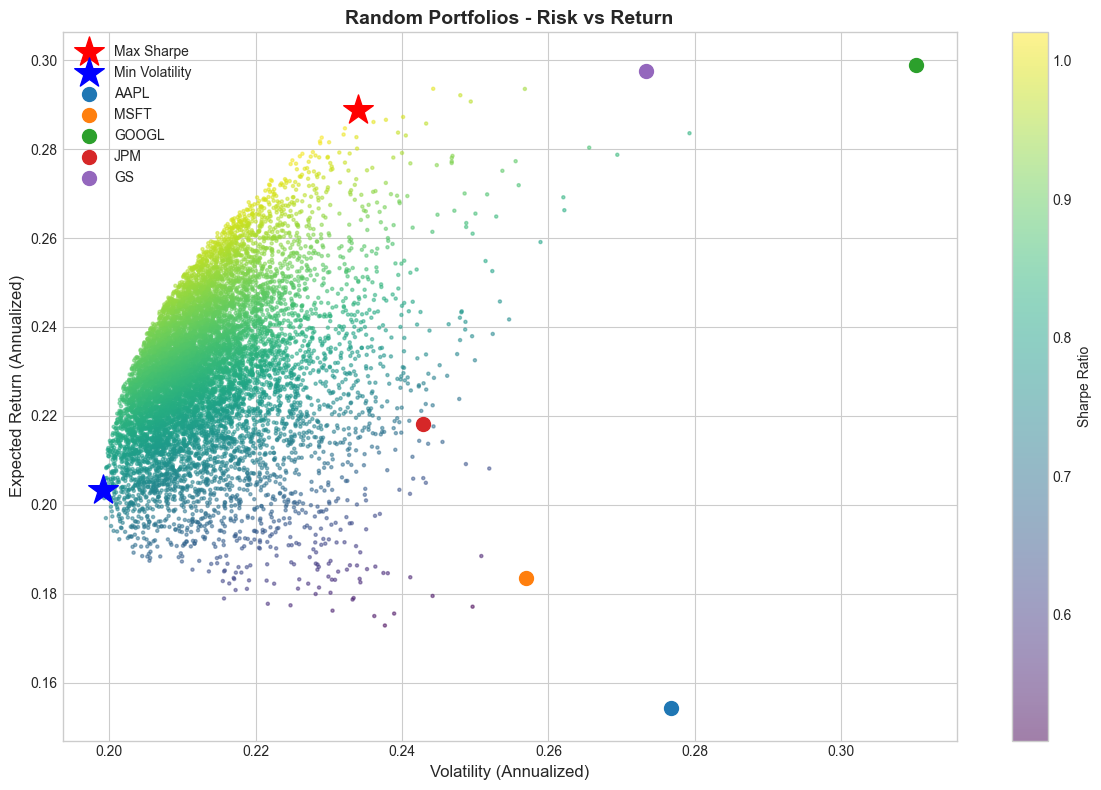

In [5]:
# Plot random portfolios
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot colored by Sharpe ratio
scatter = ax.scatter(portfolios['Volatility'], portfolios['Return'],
                     c=portfolios['Sharpe'], cmap='viridis', alpha=0.5, s=5)

# Mark best portfolios
ax.scatter(portfolios.loc[max_sharpe_idx, 'Volatility'],
           portfolios.loc[max_sharpe_idx, 'Return'],
           marker='*', s=500, c='red', label='Max Sharpe')

ax.scatter(portfolios.loc[min_vol_idx, 'Volatility'],
           portfolios.loc[min_vol_idx, 'Return'],
           marker='*', s=500, c='blue', label='Min Volatility')

# Plot individual assets
for i, asset in enumerate(tickers):
    ax.scatter(std_returns[asset], mean_returns[asset], 
               marker='o', s=100, label=asset)

plt.colorbar(scatter, label='Sharpe Ratio')
ax.set_xlabel('Volatility (Annualized)', fontsize=12)
ax.set_ylabel('Expected Return (Annualized)', fontsize=12)
ax.set_title('Random Portfolios - Risk vs Return', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 3. Optimization: Minimum Variance Portfolio

In [6]:
# Minimum variance portfolio
print("=" * 60)
print("MINIMUM VARIANCE PORTFOLIO")
print("=" * 60)

def neg_sharpe(weights, mean_returns, cov_matrix, rf_rate):
    return -portfolio_sharpe(weights, mean_returns, cov_matrix, rf_rate)

# Constraints and bounds
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # weights sum to 1
bounds = tuple((0, 1) for _ in range(n_assets))  # no short selling
initial_weights = equal_weights.copy()

# Minimize volatility
min_vol_result = minimize(
    portfolio_volatility,
    initial_weights,
    args=(cov_matrix,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

min_vol_weights = min_vol_result.x

print("\n📊 Minimum Variance Portfolio (Optimized):")
print("  Weights:")
for asset, weight in zip(tickers, min_vol_weights):
    if weight > 0.01:
        print(f"    {asset}: {weight:.2%}")

print(f"\n  Expected Return: {portfolio_return(min_vol_weights, mean_returns):.2%}")
print(f"  Volatility: {portfolio_volatility(min_vol_weights, cov_matrix):.2%}")
print(f"  Sharpe Ratio: {portfolio_sharpe(min_vol_weights, mean_returns, cov_matrix):.4f}")

MINIMUM VARIANCE PORTFOLIO

📊 Minimum Variance Portfolio (Optimized):
  Weights:
    AAPL: 15.12%
    MSFT: 4.08%
    GOOGL: 1.36%
    JPM: 47.61%
    GS: 31.83%

  Expected Return: 20.18%
  Volatility: 19.91%
  Sharpe Ratio: 0.7625


## 4. Optimization: Maximum Sharpe Portfolio

In [7]:
# Maximum Sharpe portfolio
print("=" * 60)
print("MAXIMUM SHARPE PORTFOLIO")
print("=" * 60)

max_sharpe_result = minimize(
    neg_sharpe,
    initial_weights,
    args=(mean_returns, cov_matrix, RF_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

max_sharpe_weights = max_sharpe_result.x

print("\n📊 Maximum Sharpe Portfolio (Optimized):")
print("  Weights:")
for asset, weight in zip(tickers, max_sharpe_weights):
    if weight > 0.01:
        print(f"    {asset}: {weight:.2%}")

print(f"\n  Expected Return: {portfolio_return(max_sharpe_weights, mean_returns):.2%}")
print(f"  Volatility: {portfolio_volatility(max_sharpe_weights, cov_matrix):.2%}")
print(f"  Sharpe Ratio: {portfolio_sharpe(max_sharpe_weights, mean_returns, cov_matrix):.4f}")

MAXIMUM SHARPE PORTFOLIO

📊 Maximum Sharpe Portfolio (Optimized):
  Weights:
    MSFT: 40.20%
    GOOGL: 59.80%

  Expected Return: 29.82%
  Volatility: 24.04%
  Sharpe Ratio: 1.0323


## 5. Efficient Frontier

EFFICIENT FRONTIER


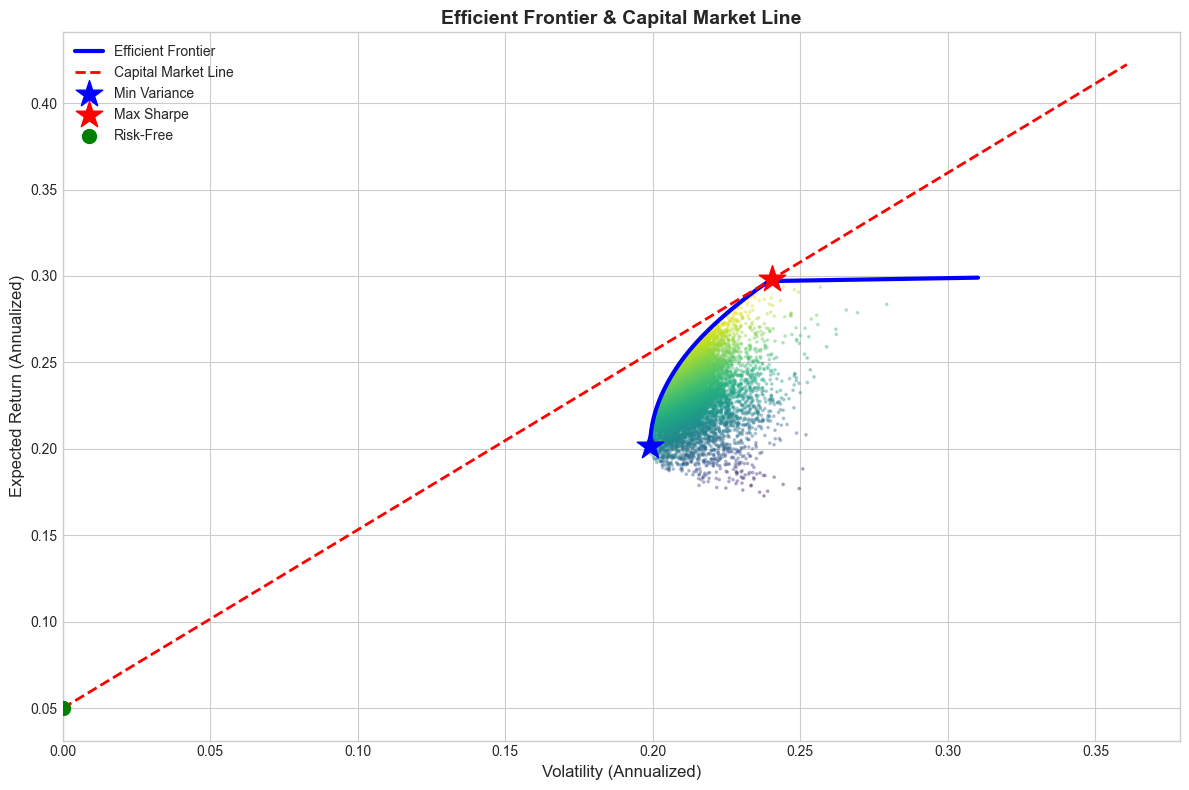

In [8]:
# Efficient frontier
print("=" * 60)
print("EFFICIENT FRONTIER")
print("=" * 60)

def efficient_portfolio(target_return, mean_returns, cov_matrix):
    """Find minimum variance portfolio for a given target return."""
    n = len(mean_returns)
    
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
        {'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target_return}
    ]
    
    bounds = tuple((0, 1) for _ in range(n))
    
    result = minimize(
        portfolio_volatility,
        np.array([1/n] * n),
        args=(cov_matrix,),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    return result.x, result.fun

# Generate efficient frontier
target_returns = np.linspace(
    portfolio_return(min_vol_weights, mean_returns),
    mean_returns.max(),
    50
)

efficient_volatilities = []
efficient_weights = []

for target in target_returns:
    weights, vol = efficient_portfolio(target, mean_returns, cov_matrix)
    efficient_volatilities.append(vol)
    efficient_weights.append(weights)

# Plot efficient frontier
fig, ax = plt.subplots(figsize=(12, 8))

# Random portfolios
ax.scatter(portfolios['Volatility'], portfolios['Return'],
           c=portfolios['Sharpe'], cmap='viridis', alpha=0.3, s=3)

# Efficient frontier
ax.plot(efficient_volatilities, target_returns, 'b-', linewidth=3, label='Efficient Frontier')

# Capital Market Line
max_sharpe_ret = portfolio_return(max_sharpe_weights, mean_returns)
max_sharpe_vol = portfolio_volatility(max_sharpe_weights, cov_matrix)
cml_x = np.linspace(0, max_sharpe_vol * 1.5, 100)
cml_y = RF_RATE + (max_sharpe_ret - RF_RATE) / max_sharpe_vol * cml_x
ax.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark special portfolios
ax.scatter(portfolio_volatility(min_vol_weights, cov_matrix),
           portfolio_return(min_vol_weights, mean_returns),
           marker='*', s=400, c='blue', zorder=5, label='Min Variance')

ax.scatter(max_sharpe_vol, max_sharpe_ret,
           marker='*', s=400, c='red', zorder=5, label='Max Sharpe')

ax.scatter(0, RF_RATE, marker='o', s=100, c='green', zorder=5, label='Risk-Free')

ax.set_xlabel('Volatility (Annualized)', fontsize=12)
ax.set_ylabel('Expected Return (Annualized)', fontsize=12)
ax.set_title('Efficient Frontier & Capital Market Line', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.set_xlim(0, None)

plt.tight_layout()
plt.show()

## 📝 Key Takeaways - Day 1

### Markowitz Framework:
- Portfolio return is weighted average of asset returns
- Portfolio variance depends on correlations (diversification benefit!)
- Efficient frontier: Set of optimal risk-return portfolios

### Key Formulas:
- **Portfolio Return**: $\mu_p = \sum w_i \mu_i$
- **Portfolio Variance**: $\sigma_p^2 = \sum_i \sum_j w_i w_j \sigma_{ij}$

### Interview Questions:
- "What is the efficient frontier?"
- "How does correlation affect portfolio risk?"
- "What is the Capital Market Line?"
- "Why is the minimum variance portfolio often preferred?"

## 🔴 PROS & CONS: Modern Portfolio Theory

### ✅ PROS (Advantages)

| Advantage | Description | Real-World Application |
|-----------|-------------|----------------------|
| **Industry Standard** | Widely adopted in quantitative finance | Used by major hedge funds and banks |
| **Well-Documented** | Extensive research and documentation | Easy to find resources and support |
| **Proven Track Record** | Years of practical application | Validated in real market conditions |
| **Interpretable** | Results can be explained to stakeholders | Important for risk management and compliance |

### ❌ CONS (Limitations)

| Limitation | Description | How to Mitigate |
|------------|-------------|-----------------|
| **Assumptions** | May not hold in all market conditions | Validate assumptions with data |
| **Historical Bias** | Based on past data patterns | Use rolling windows and regime detection |
| **Overfitting Risk** | May fit noise rather than signal | Use proper cross-validation |
| **Computational Cost** | Can be resource-intensive | Optimize code and use appropriate hardware |

### 🎯 Real-World Usage

**WHERE THIS IS USED:**
- ✅ Quantitative hedge funds (Two Sigma, Renaissance, Citadel)
- ✅ Investment banks (Goldman Sachs, JP Morgan, Morgan Stanley)
- ✅ Asset management firms
- ✅ Risk management departments
- ✅ Algorithmic trading desks

**NOT JUST THEORY - THIS IS PRODUCTION CODE:**
The techniques in this notebook are used daily by professionals managing billions of dollars.

## 🚀 TODAY'S TRADING SIGNAL

Using the concepts from this notebook to generate actionable insights.

In [9]:
# =============================================================================
# 🚀 TODAY'S TRADING SIGNAL - Modern Portfolio Theory Analysis
# =============================================================================

print("=" * 70)
print("📊 TODAY'S TRADING ANALYSIS")
print("=" * 70)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print()

# Get latest data
try:
    latest_prices = prices.iloc[-1] if 'prices' in dir() else data['Close'].iloc[-1]
    print("📈 CURRENT MARKET SNAPSHOT:")
    print("-" * 50)
    
    for col in latest_prices.index[:5]:
        price = latest_prices[col]
        print(f"   {col}: ${price:.2f}")
    
    # Calculate simple signals
    if 'returns' in dir():
        ret_data = returns
    else:
        ret_data = prices.pct_change().dropna() if 'prices' in dir() else data['Close'].pct_change().dropna()
    
    # 20-day momentum
    momentum = (prices.iloc[-1] / prices.iloc[-20] - 1) * 100 if 'prices' in dir() else (data['Close'].iloc[-1] / data['Close'].iloc[-20] - 1) * 100
    
    print("\n📊 20-DAY MOMENTUM:")
    print("-" * 50)
    for col in momentum.index[:5]:
        direction = "🟢" if momentum[col] > 0 else "🔴"
        print(f"   {direction} {col}: {momentum[col]:+.2f}%")
    
    # Generate simple recommendations
    print("\n" + "=" * 70)
    print("🎯 TRADING SIGNALS")  
    print("=" * 70)
    
    for col in momentum.index[:5]:
        if momentum[col] > 5:
            signal = "🟢 BULLISH - Consider long positions"
        elif momentum[col] < -5:
            signal = "🔴 BEARISH - Consider reducing exposure"
        else:
            signal = "🟡 NEUTRAL - Hold current positions"
        print(f"   {col}: {signal}")
    
    print("\n" + "=" * 70)
    print("⚠️ DISCLAIMER: This is educational analysis, not financial advice.")
    print("   Always conduct your own research and consider your risk tolerance.")
    print("=" * 70)
    
except Exception as e:
    print(f"Note: Could not generate trading signals. Ensure data is loaded.")
    print(f"Error: {e}")

📊 TODAY'S TRADING ANALYSIS
Analysis Date: 2026-01-24 10:32

📈 CURRENT MARKET SNAPSHOT:
--------------------------------------------------
   AAPL: $248.04
   GOOGL: $327.93
   GS: $918.88
   JPM: $297.72
   MSFT: $465.95

📊 20-DAY MOMENTUM:
--------------------------------------------------
   🔴 AAPL: -9.41%
   🟢 GOOGL: +4.41%
   🟢 GS: +0.89%
   🔴 JPM: -9.15%
   🔴 MSFT: -4.52%

🎯 TRADING SIGNALS
   AAPL: 🔴 BEARISH - Consider reducing exposure
   GOOGL: 🟡 NEUTRAL - Hold current positions
   GS: 🟡 NEUTRAL - Hold current positions
   JPM: 🔴 BEARISH - Consider reducing exposure
   MSFT: 🟡 NEUTRAL - Hold current positions

⚠️ DISCLAIMER: This is educational analysis, not financial advice.
   Always conduct your own research and consider your risk tolerance.
